In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import scipy.stats as stats
from PLAB.utils import gini_coefficient

In [2]:
file_sample_names = ['liquid', 'semisolid', 'small_plate','large_plate', 'bead']
names_dict = {'liquid': 'liquid', 'semisolid': 'semisolid', 'small_plate': 'high density spread', 'bead': 'bead spread', 'large_plate': 'low density spread'}
sample_names = [names_dict[name] for name in file_sample_names]
counts = []

for sample in file_sample_names:
    for replicate in range(1, 5):
        with open(f'../../data/20240318_counts/N80_counts_20240318/{sample}_{replicate}.pkl', 'rb') as f:
            clusters = pickle.load(f)
            for center in clusters:
                counts.append((names_dict[sample], replicate, center, clusters[center].total()))

df = pd.DataFrame(counts, columns=['sample', 'rep', 'sequence', 'count'])

In [3]:
df.head()

,sample,rep,sequence,count
0,liquid,1,CGATAAGGTGGACCATTATGTGAAGTGGAGGAAAGAGCTTTCAAAT...,120
1,liquid,1,CTGGGTTTGCCAGGTTCACGAAGTGCGGTAGTCCGTAGTGATTTAA...,105
2,liquid,1,AATCCTTATGAGTGTCGGGTAGGGGCCGGAAAAGATAATTCCTTCA...,103
3,liquid,1,TTAATAATAAGAAACATCGTAGTAGTATATCTGGCTAAGCCTGACA...,102
4,liquid,1,TGGTGTATGTTGGGTGCGCGTGTCCAGTAGATTAAAAAGAACCTAA...,100


In [4]:
# sample_stats = []
# for rep in range(1, 5):
#     for sample in sample_names:
#         sample_counts = df.loc[(df['rep'] == rep) & (df['sample'] == sample)]['count']
#         nobs, minmax, mean, var, skew, kurtosis = stats.describe(sample_counts)
#         reads = sample_counts.sum()
#         gini = gini_coefficient(np.array(sample_counts))
#         median = np.median(sample_counts)
#         stdev = np.std(sample_counts)
#         sample_stats.append((sample, rep, nobs, reads, minmax[1], mean, median, stdev, skew, kurtosis, gini))
# sample_stats_df = pd.DataFrame(sample_stats, columns=['sample', 'rep', 'unique seqs', 'reads', 'max', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'gini'])
# sample_stats_df

In [5]:
# sample_stats_df_long = sample_stats_df.melt(id_vars=['sample', 'rep'])
# sample_stats_df_long.to_pickle('sample_stats.pkl')
# sample_stats_df_long.head()

In [6]:
sample_stats_df_long = pd.read_pickle('sample_stats.pkl')

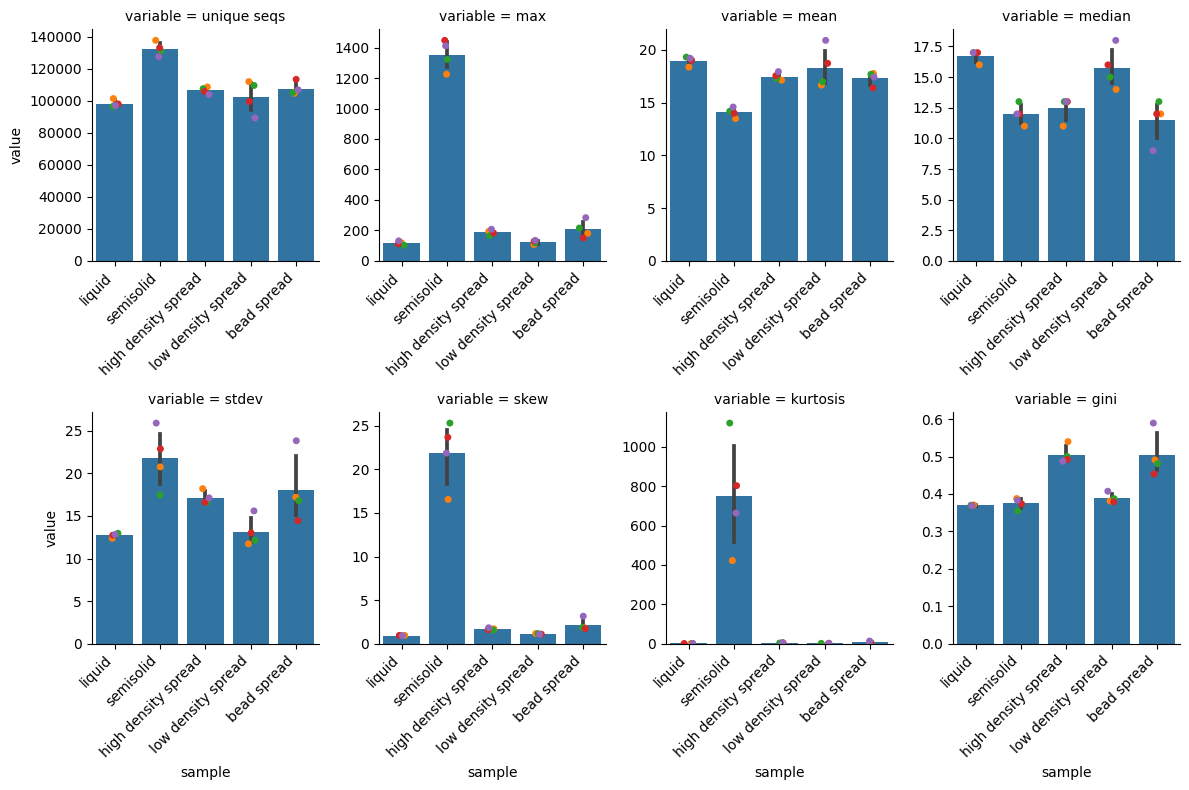

In [7]:
g = sns.FacetGrid(sample_stats_df_long, col='variable',
                  col_order=['unique seqs', 'max', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'gini'],
                  col_wrap=4, height=4, aspect=0.75, sharex=False, sharey=False)
g.map(sns.barplot, 'sample', 'value', order=sample_names)
g.map(sns.stripplot, 'sample', 'value', 'rep', order=sample_names, hue_order=[1, 2, 3, 4], palette=sns.color_palette()[1:5])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
colors = ["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00"]
sns.set_palette(sns.color_palette(colors))

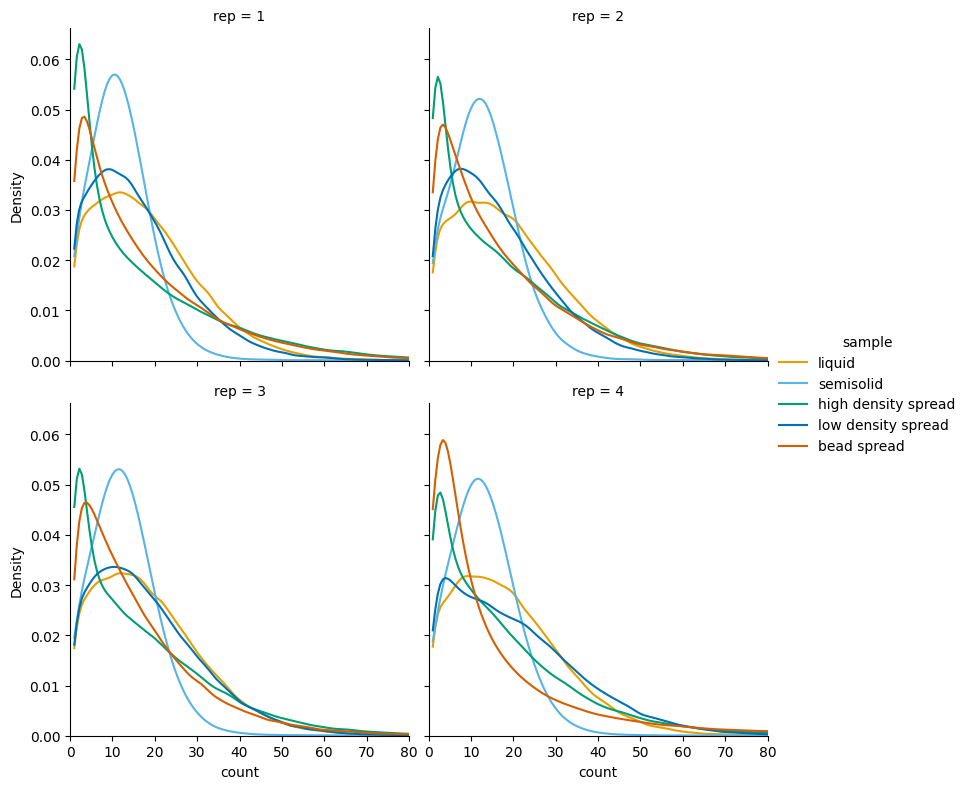

In [9]:
g = sns.FacetGrid(df, col='rep', hue='sample', col_wrap=2, height=4)
g.map(sns.kdeplot, 'count', clip=[1,120])
plt.xlim([0,80])
g.add_legend()
plt.show()

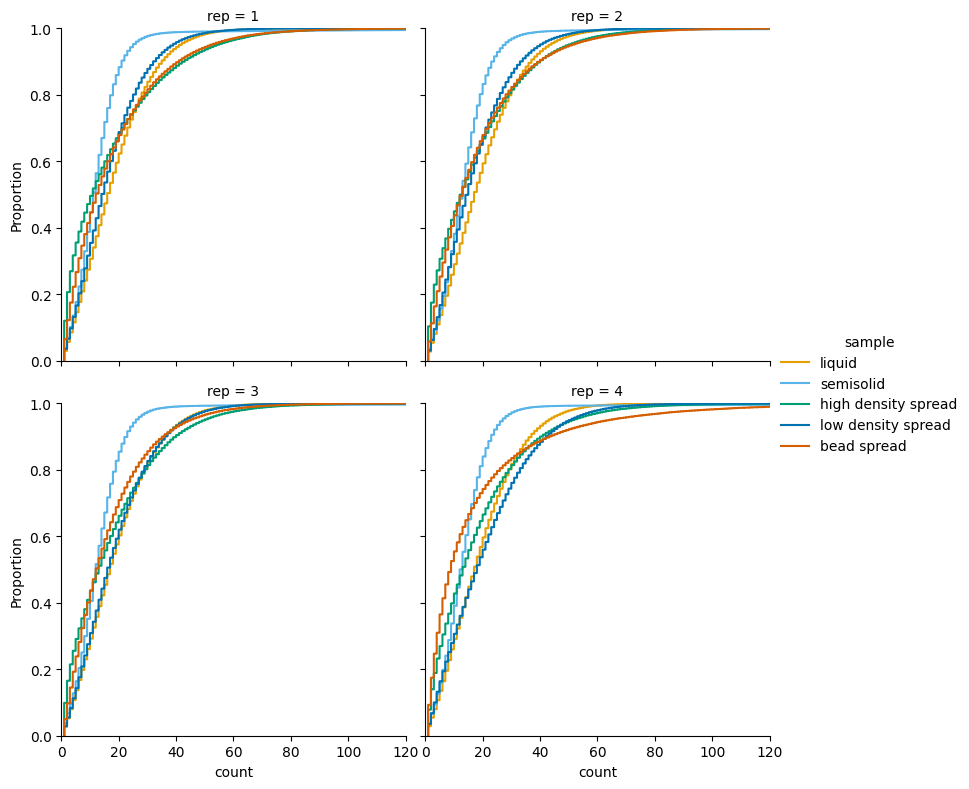

In [10]:
g = sns.FacetGrid(df, col='rep', hue='sample', col_wrap=2, height=4)
g.map(sns.ecdfplot, 'count')
plt.xlim([0,120])
g.add_legend()
plt.show()

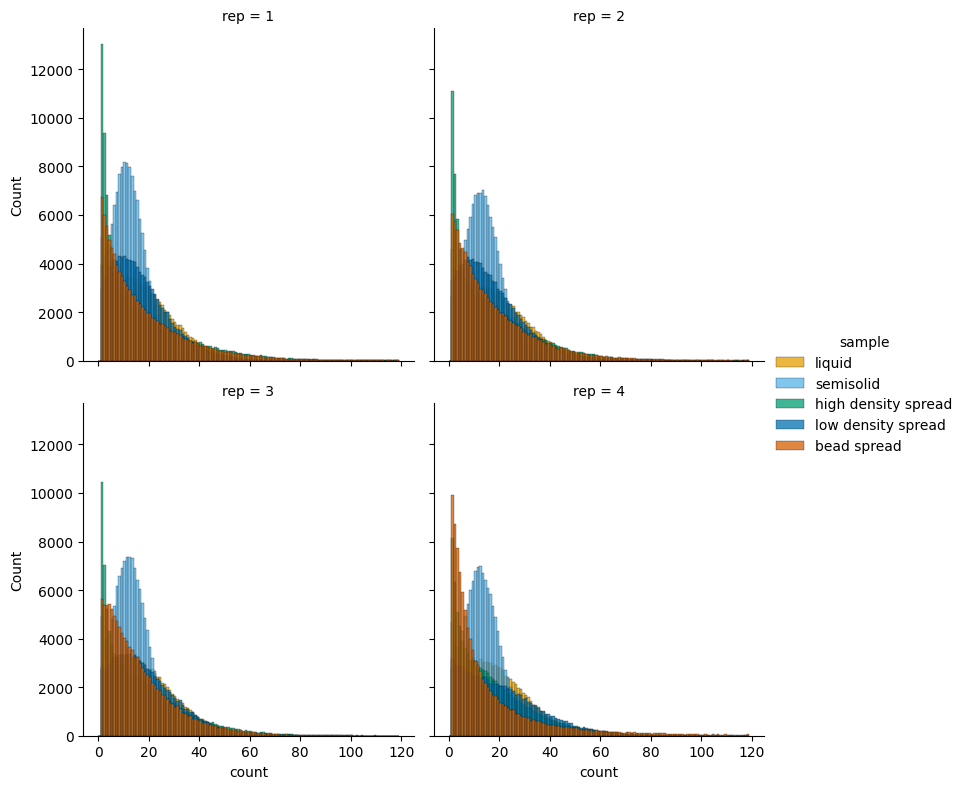

In [11]:
g = sns.FacetGrid(df, col='rep', hue='sample', col_wrap=2, height=4)
g.map(sns.histplot, 'count', bins=range(120))
g.add_legend()
plt.show()

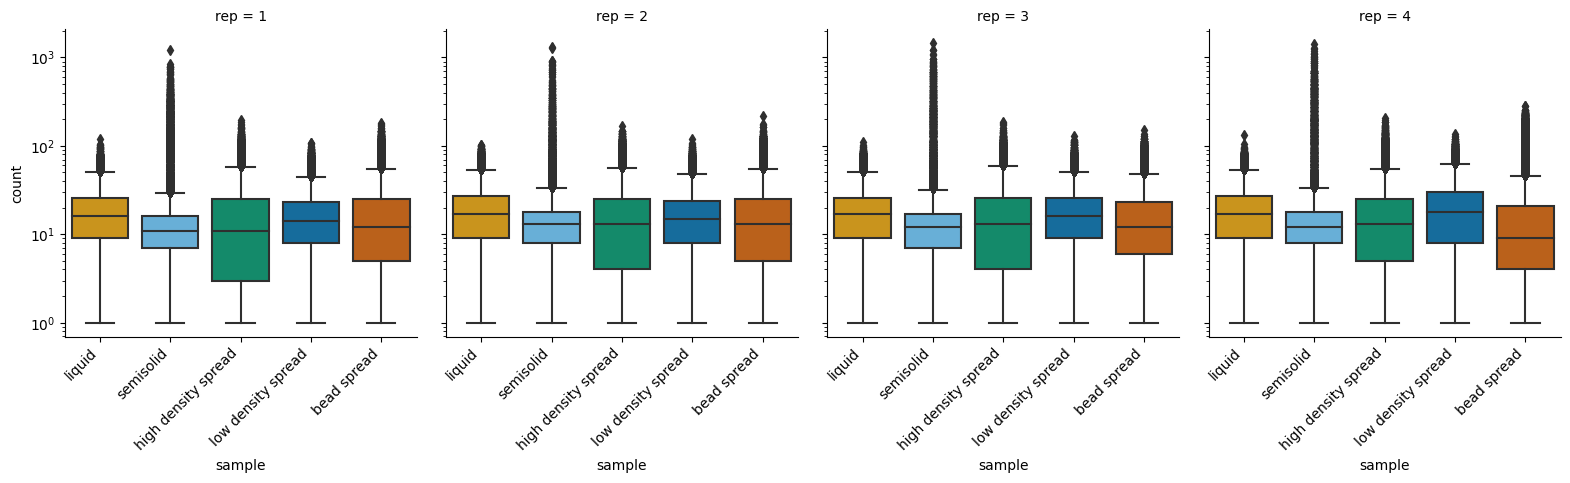

In [12]:
g = sns.catplot(data=df, x="sample", y="count", col='rep', col_wrap=4, height=4, kind='box')
g.set(yscale="log")
g.set_xticklabels(rotation=45, ha='right')
plt.show()

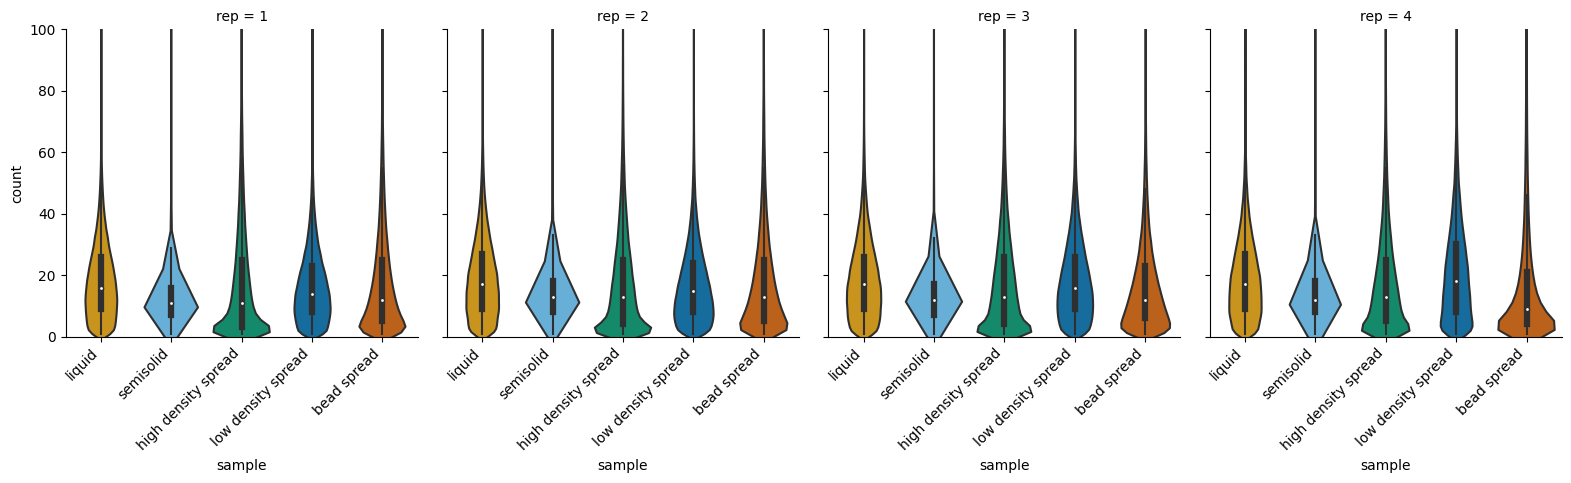

In [13]:
g = sns.catplot(data=df, x="sample", y="count", col='rep', col_wrap=4, height=4, kind='violin')
g.set_xticklabels(rotation=45, ha='right')
for ax in g.axes.flat:
    ax.set_ylim(0, 100)
plt.show()